# SciPy

In [1]:
%pylab inline
from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


Some of the topics that SciPy covers are:

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

In [8]:
from scipy.special import jn, yn, jn_zeros, yn_zeros

## Special functions

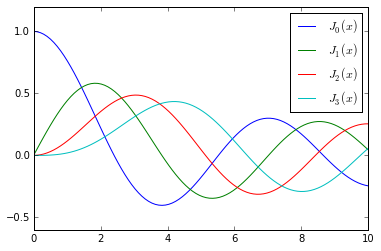

In [11]:
x = linspace(0, 10, 100)

fig, ax = subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label = r"$J_%d(x)$" % n)
ax.legend();

In [12]:
from scipy.integrate import quad, dblquad, tplquad

In [13]:
def f(x):
    return x

In [17]:
x_lower = 0
x_upper = 1

val, abserr = quad(f, x_lower, x_upper)

print "integral value = ", val, "\nabsolute error = ", abserr

integral value =  0.5 
absolute error =  5.55111512313e-15


In [35]:
x_lower = 0
x_upper = 10
val, abserr = quad(lambda x: jn(3, x), x_lower, x_upper)
print val, abserr

0.736675137081 9.3891268825e-13


In [36]:
x_lower = 0
x_upper = 10
val, abserr = quad(lambda x, n: jn(n, x), x_lower, x_upper, args = 3)
print val, abserr

0.736675137081 9.3891268825e-13


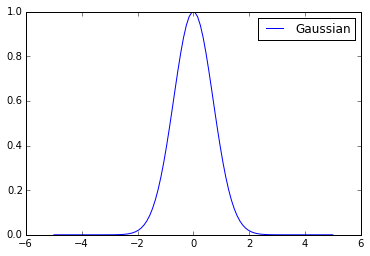

In [40]:
x = linspace(-5, 5, 100)
plt, ax = subplots()
ax.plot(x, exp(-x**2), label = "Gaussian")
ax.legend();

In [41]:
val, abserr = quad(lambda x: exp(-x**2), -Inf, Inf)

print "numerical  =", val, abserr
print "analytical =", sqrt(pi)

numerical  = 1.77245385091 1.42026367809e-08
analytical = 1.77245385091


In [43]:
x_lower = 0  
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = dblquad(lambda x, y: exp(-x**2-y**2), x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)
print val, abserr

0.785398163397 1.63822994214e-13


## Ordinary differential equations (ODEs)

SciPy provides two different ways to solve ODEs: An API based on the function `odeint`, and object-oriented API based on the class `ode`. Usually `odeint` is easier to get started with, but the `ode` class offers some finer level of control.

Here we will use the `odeint` functions. For more information about the class `ode`, try `help(ode)`. It does pretty much the same thing as `odeint`, but in an object-oriented fashion.

To use `odeint`, first import it from the `scipy.integrate` module

In [45]:
from scipy.integrate import odeint, ode

### Example: double pendulum

In [47]:
Image(url="http://scienceworld.wolfram.com/physics/dimg270.gif")

In [63]:
def dx(x, t):
    x1, x2, p1, p2 = x[0], x[1], x[2], x[3]
    
    cosine = 3*cos(x1-x2)
    dx1 = 6.0*(2*p1-cosine*p2)/(16.0-cosine**2)
    dx2 = 6.0*(2*p2-cosine*p1)/(16.0-cosine**2)
    
    sine = dx1*dx2*sin(x1-x2)
    dp1 = -0.5*(sine+3*sin(x1))
    dp2 = -0.5*(-sine+sin(x2))
    return [dx1, dx2, dp1, dp2]

In [99]:
x0 = [pi/12, pi/6, 0, 0]
t = linspace(0, 50, 500)
x = odeint(dx, x0, t)

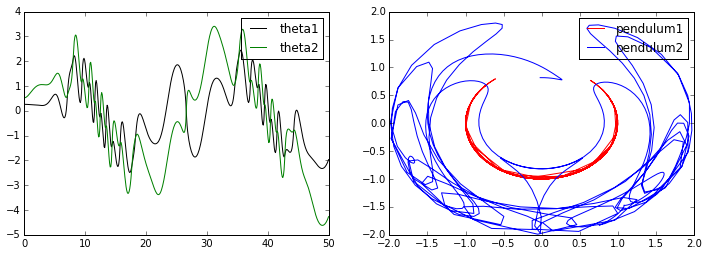

In [100]:
# plot the angles as a function of time

fig, axes = subplots(1,2, figsize=(12,4))
axes[0].plot(t, x[:, 0], 'k', label="theta1")
axes[0].plot(t, x[:, 1], 'g', label="theta2")
axes[0].legend()

x1 = sin(x[:, 0])
y1 = -cos(x[:, 0])

x2 = x1 + sin(x[:, 1])
y2 = y1 - cos(x[:, 1])
    
axes[1].plot(x1, y1, 'r', label="pendulum1")
axes[1].plot(x2, y2, 'b', label="pendulum2")
axes[1].legend();

In [83]:
from IPython.display import clear_output
import time

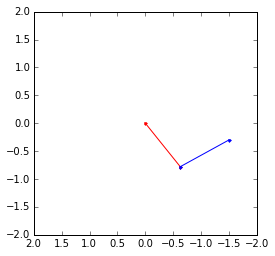

In [85]:
fig, ax = subplots(figsize=(4,4))

for t_idx, tt in enumerate(t[:200]):

    x1 = sin(x[t_idx, 0])
    y1 = -cos(x[t_idx, 0])

    x2 = x1 + sin(x[t_idx, 1])
    y2 = y1 - cos(x[t_idx, 1])
    
    ax.cla()  
    ax.plot([0, x1], [0, y1], 'r.-')
    ax.plot([x1, x2], [y1, y2], 'b.-')
    ax.set_ylim([-2, 2])
    ax.set_xlim([2, -2])

    display(fig)
    clear_output()
    
    time.sleep(0.1)

### Example: damped harmonic oscillator

The equation of motion for the damped oscillator is:
$$
\frac{\mathrm{d}^2x}{\mathrm{d}t^2}
+ 2\zeta\omega_0 \frac{\mathrm{d}x}{\mathrm{d}t}
+ \omega_0^2 x = 0,
$$
where $x$ is the position of the oscillator, $\omega_0$ is the frequency, and $\zeta$ is the damping ratio.

To write this second-order ODE on standard form we introduce $p = \frac{\mathrm{d}x}{\mathrm{d}t}$:

$\displaystyle \frac{\mathrm{d}p}{\mathrm{d}t} = - 2\zeta\omega_0 p - \omega^2_0 x$

$\displaystyle \frac{\mathrm{d}x}{\mathrm{d}t} = p$

In [86]:
def dy(y, t, zeta, omega0):
    x, p = y[0], y[1]
    
    dx = p
    dp = -2*zeta*omega0*p - omega0**2 * x
    
    return [dx, dp]

In [101]:
y0 = [1.0, 0.0]
t1 = linspace(0, 10, 1000)
omega0 = 2.0*pi

In [102]:
y1 = odeint(dy, y0, t1, args = (0.0, omega0))
y2 = odeint(dy, y0, t1, args = (0.2, omega0))
y3 = odeint(dy, y0, t1, args = (1.0, omega0))
y4 = odeint(dy, y0, t1, args = (5.0, omega0))

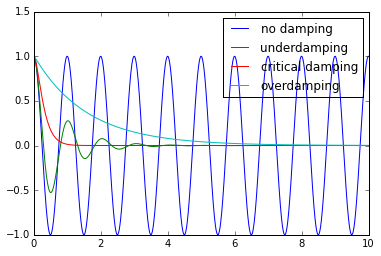

In [103]:
fig, ax = subplots()
ax.plot(t1, y1[:, 0], label="no damping")
ax.plot(t1, y2[:, 0], label="underdamping")
ax.plot(t1, y3[:, 0], label="critical damping")
ax.plot(t1, y4[:, 0], label="overdamping")

ax.legend();

## Fourier transform

In [93]:
from scipy.fftpack import *

In [104]:
F = fft(y2[:, 0])

N = len(t1)
dt = t1[1] - t1[0]
omega = fftfreq(N, dt)

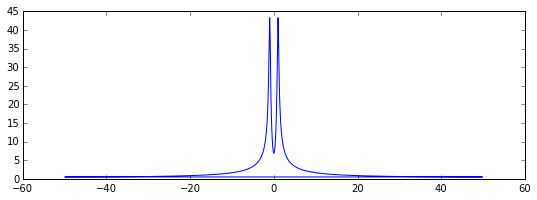

In [105]:
fig, ax = subplots(figsize = (9, 3))
ax.plot(omega, abs(F));

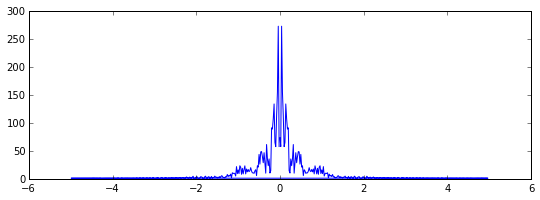

In [107]:
G = fft(x[:, 0])

N = len(t)
dt = t[1] - t[0]
om = fftfreq(N, dt)

fig, ax = subplots(figsize = (9, 3))
ax.plot(om, abs(G));

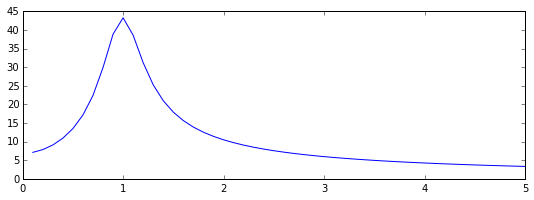

In [108]:
indices = where(omega > 0)
omega_positive = omega[indices]
F_positive = F[indices]

fig, ax = subplots(figsize=(9,3))
ax.plot(omega_positive, abs(F_positive))
ax.set_xlim(0, 5);

## Linear algebra

In [112]:
A = rand(4, 4)
b = rand(4)
x = solve(A, b)
print x

[ 0.43114147 -0.33348452  0.16623396  0.28688786]


In [111]:
print dot(A, x) - b

[ -1.11022302e-16  -1.11022302e-16   1.66533454e-16   1.52655666e-16]


In [115]:
B = rand(4, 6)
x = solve(A, B)
print (dot(A, x) - B).max()

5.55111512313e-16


In [117]:
evals = eigvals(A)
print evals

[ 1.92168225 -0.29999483  0.54463072  0.26609668]


In [120]:
evals, evecs = eig(A)
print evals
print evecs

[ 1.92168225 -0.29999483  0.54463072  0.26609668]
[[-0.62258673 -0.78424387 -0.57861389  0.17202522]
 [-0.65724269  0.37823193 -0.39681798 -0.65181742]
 [-0.29605771 -0.17388746  0.70055076  0.36548151]
 [-0.30457781  0.46007099  0.13026933  0.64184472]]


In [128]:
norm(array([ dot(A, evecs[:, i]) - evals[i] * evecs[:, i] for i in range(4)]))

1.4760447993160846e-15

In [135]:
print norm(A), norm(A, 2), norm(A, Inf), norm(A, 1), norm(A, 'fro')

 2.16808136366 2.03670326276 2.42832328757 2.59963769628 2.16808136366


### Sparse matrices

In [137]:
from scipy.sparse import *

In [138]:
M = array([[1,0,0,0], [0,3,0,0], [0,1,1,0], [1,0,0,1]])
print M

[[1 0 0 0]
 [0 3 0 0]
 [0 1 1 0]
 [1 0 0 1]]


In [142]:
A = csr_matrix(M) # convert from dense to sparse
print A

  (0, 0)	1
  (1, 1)	3
  (2, 1)	1
  (2, 2)	1
  (3, 0)	1
  (3, 3)	1


In [153]:
print A.todense() # convert from sparse to dense
print type(A.todense())

[[ 1.  0.  0.  0.]
 [ 0.  3.  0.  0.]
 [ 0.  1.  1.  0.]
 [ 1.  0.  0.  1.]]
<class 'numpy.matrixlib.defmatrix.matrix'>


More efficient way to create sparse matrices: create an empty matrix and populate with using matrix indexing (avoids creating a potentially large dense matrix)

In [147]:
A = lil_matrix((4,4))
A[0,0] = A[2,2] = A[3,3] = A[3, 0] = A[2, 1] = 1
A[1,1] = 3
print A
print A.todense()

  (0, 0)	1.0
  (1, 1)	3.0
  (2, 1)	1.0
  (2, 2)	1.0
  (3, 0)	1.0
  (3, 3)	1.0
[[ 1.  0.  0.  0.]
 [ 0.  3.  0.  0.]
 [ 0.  1.  1.  0.]
 [ 1.  0.  0.  1.]]


In [148]:
A

<4x4 sparse matrix of type '<type 'numpy.float64'>'
	with 6 stored elements in LInked List format>

In [149]:
A = csr_matrix(A)
A

<4x4 sparse matrix of type '<type 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [150]:
A = csc_matrix(A)
A

<4x4 sparse matrix of type '<type 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Column format>

In [155]:
(A * A).todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  9.,  0.,  0.],
        [ 0.,  4.,  1.,  0.],
        [ 2.,  0.,  0.,  1.]])

In [160]:

A.dot(A).todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  9.,  0.,  0.],
        [ 0.,  4.,  1.,  0.],
        [ 2.,  0.,  0.,  1.]])

In [166]:
multiply(A, A).todense() # this is not elementwise!?

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  9.,  0.,  0.],
        [ 0.,  4.,  1.,  0.],
        [ 2.,  0.,  0.,  1.]])

In [169]:
v = array([1, 2, 3, 4])[:, newaxis]
print v

[[1]
 [2]
 [3]
 [4]]


In [171]:
print A * v

[[ 1.]
 [ 6.]
 [ 5.]
 [ 5.]]


## Optimization

In [172]:
from scipy.optimize import *

In [173]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

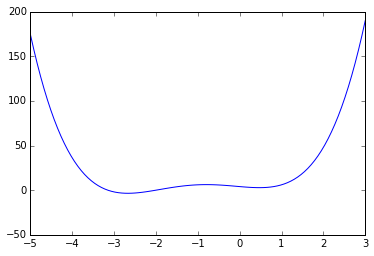

In [177]:
fig, ax = subplots()
x = linspace(-5, 3, 100)
ax.plot(x, f(x));

In [180]:
x_min = fmin_bfgs(f, -2)
print x_min

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 6
         Function evaluations: 30
         Gradient evaluations: 10
[-2.67298167]


In [181]:
x_min = fmin_bfgs(f, 0.5)
print x_min

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 15
         Gradient evaluations: 5
[ 0.46961745]


In [184]:
brent(f)

0.46961743402759754

In [185]:
fminbound(f, -4, 2)

-2.6729822917513886

### Zeros of a function

In [188]:
omega_c = 3.0
def f(omega):
    # a transcendental equation: resonance frequencies of a low-Q SQUID terminated microwave resonator
    return tan(2*pi*omega) - omega_c/omega

/home/ilijan/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide


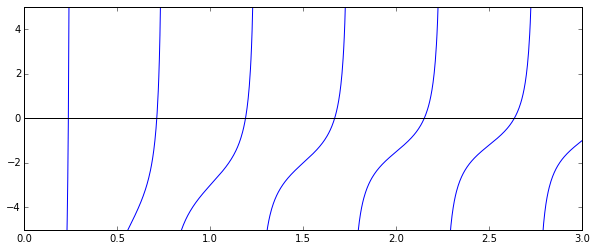

In [191]:
fig, ax  = subplots(figsize=(10,4))
x = linspace(0, 3, 1000)
y = f(x)
mask = where(abs(y) > 50)
# get rid of vertical line when the function flips sign
x[mask] = y[mask] = NaN
ax.plot(x, y)
ax.plot([0, 3], [0, 0], 'k')
ax.set_ylim(-5,5);

In [194]:
fsolve(f, 0.1)

array([ 0.23743014])

In [195]:
fsolve(f, 0.6)

array([ 0.71286972])

In [197]:
fsolve(f, 1.1)

array([ 1.18990285])

## Interpolation

In [198]:
from scipy.interpolate import *

In [199]:
def f(x):
    return sin(x)

In [212]:
n = arange(10)
y_measurement = f(n) + 0.1*randn(len(n))
x = linspace(0, 9, 100)

y_linear = interp1d(n, y_measurement)
y_cubic = interp1d(n, y_measurement, kind = 'cubic')

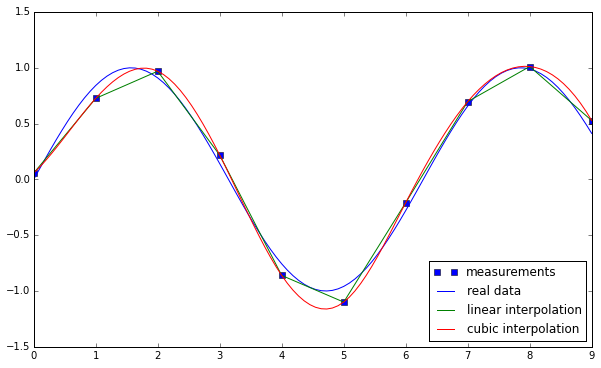

In [216]:
fig, ax = subplots(figsize=(10, 6))
ax.plot(n, y_measurement, 'bs', label='measurements')
ax.plot(x, f(x), label='real data')
ax.plot(x, y_linear(x), label='linear interpolation')
ax.plot(x, y_cubic(x), label='cubic interpolation')
ax.legend(loc=4);

## Statistics

In [217]:
from scipy.stats import *

In [226]:
X = poisson(3.5)

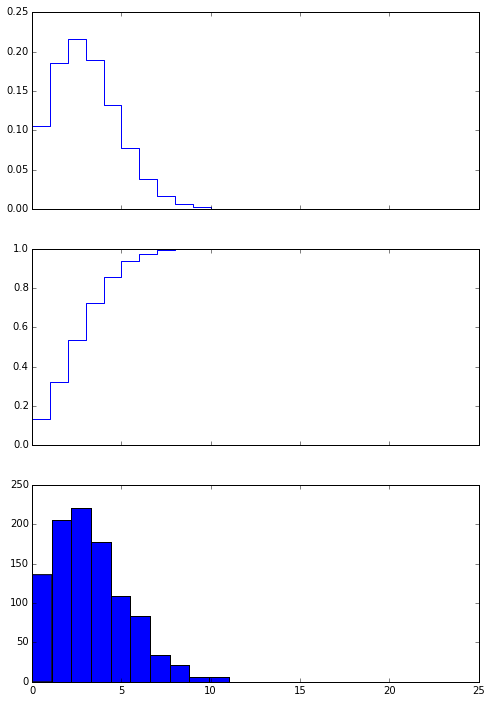

In [230]:
n = arange(0, 25)
fig, ax = subplots(3, 1, sharex = True, figsize = (8, 12))

# probability mass function (PMF)
ax[0].step(n, X.pmf(n))

# cummulative distribution function (CDF)
ax[1].step(n, X.cdf(n))

# histogram of 1000 random realizations of the
# stochastic variable X (Random variates of given type)
ax[2].hist(X.rvs(size = 1000));

In [243]:
# create a (continous) random variable with normal distribution
Y = norm()

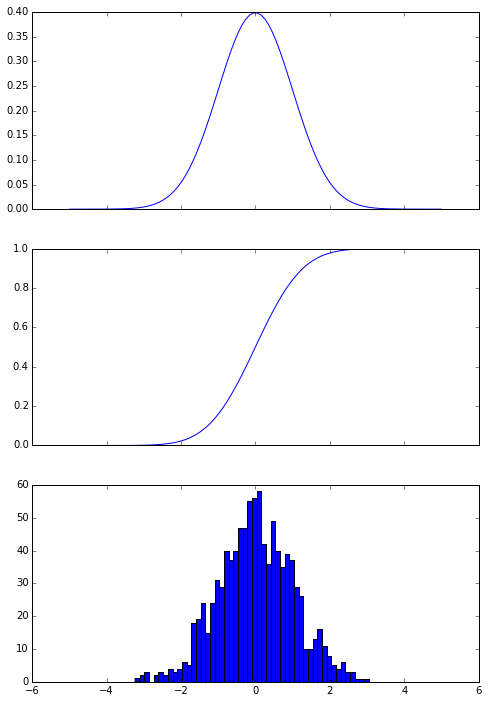

In [255]:
x = linspace(-5, 5, 100)
fig, ax = subplots(3, 1, sharex = True, figsize = (8, 12))

# probability distribution function (PDF)
ax[0].plot(x, Y.pdf(x))

# cummulative distribution function (CDF)
ax[1].plot(x, Y.cdf(x))

# histogram of 1000 random realizations of the
# stochastic variable X (Random variates of given type)
ax[2].hist(Y.rvs(size = 1000), bins = 50);

In [256]:
X.mean(), X.std(), X.var() # poission distribution

(3.5, 1.8708286933869707, 3.5)

In [257]:
Y.mean(), Y.std(), Y.var() # normal distribution

(0.0, 1.0, 1.0)

### Statistical tests -- skipped

## Exercises

### Sparse matrix linear system

In [362]:
from numpy import random as r

In [363]:
mask = r.rand(1000, 1000) > 0.99
mask.sum()

10022

In [364]:
A = lil_matrix((1000, 1000))

In [365]:
A[mask] = r.rand(mask.sum())

In [366]:
A = csr_matrix(A)

In [367]:
b = csr_matrix(r.rand(1000, 1))

In [382]:
from scipy.sparse.linalg import spsolve
x = spsolve(A, b)
print matrix(x).T

[[  1.32649503e+01]
 [  2.90779215e+01]
 [  1.39824605e+01]
 [  7.45771856e+00]
 [ -4.29401764e+01]
 [  1.54224578e+01]
 [  3.63610276e+01]
 [  1.80627218e+01]
 [  2.17087372e+01]
 [  2.43314391e+01]
 [ -5.14372040e+01]
 [ -1.84419468e+01]
 [ -9.36357300e+01]
 [ -8.62639722e+00]
 [ -7.20855568e+01]
 [  3.54661991e+01]
 [ -1.25509822e+02]
 [  1.00225700e+01]
 [ -1.15378386e+02]
 [ -6.55581247e-01]
 [ -1.48782316e+01]
 [ -4.61715871e+01]
 [ -2.89740188e+01]
 [ -2.22014017e+01]
 [ -3.24990174e+01]
 [ -3.50744963e+01]
 [  1.70416598e+01]
 [ -2.26942343e+01]
 [  5.56766790e+01]
 [ -6.45539138e+01]
 [  1.68159774e+01]
 [ -2.42088583e+00]
 [  1.65364237e+01]
 [  6.72438956e+01]
 [ -2.26534178e+01]
 [  6.56264211e+01]
 [  1.61200880e+01]
 [ -3.56517452e+01]
 [  5.59567571e+01]
 [  4.12621914e+01]
 [ -1.11968819e+01]
 [  5.07191995e+01]
 [  4.41153584e+01]
 [  6.63681798e+01]
 [  5.33580190e+01]
 [ -1.86107600e+01]
 [ -2.10597531e+01]
 [ -1.49333987e+01]
 [ -1.97286045e+01]
 [  3.97611815e+01]


In [376]:
x = solve(A.todense(), b.todense())
print x

[[  1.32649503e+01]
 [  2.90779215e+01]
 [  1.39824605e+01]
 [  7.45771856e+00]
 [ -4.29401764e+01]
 [  1.54224578e+01]
 [  3.63610276e+01]
 [  1.80627218e+01]
 [  2.17087372e+01]
 [  2.43314391e+01]
 [ -5.14372040e+01]
 [ -1.84419468e+01]
 [ -9.36357300e+01]
 [ -8.62639722e+00]
 [ -7.20855568e+01]
 [  3.54661991e+01]
 [ -1.25509822e+02]
 [  1.00225700e+01]
 [ -1.15378386e+02]
 [ -6.55581247e-01]
 [ -1.48782316e+01]
 [ -4.61715871e+01]
 [ -2.89740188e+01]
 [ -2.22014017e+01]
 [ -3.24990174e+01]
 [ -3.50744963e+01]
 [  1.70416598e+01]
 [ -2.26942343e+01]
 [  5.56766790e+01]
 [ -6.45539138e+01]
 [  1.68159774e+01]
 [ -2.42088583e+00]
 [  1.65364237e+01]
 [  6.72438956e+01]
 [ -2.26534178e+01]
 [  6.56264211e+01]
 [  1.61200880e+01]
 [ -3.56517452e+01]
 [  5.59567571e+01]
 [  4.12621914e+01]
 [ -1.11968819e+01]
 [  5.07191995e+01]
 [  4.41153584e+01]
 [  6.63681798e+01]
 [  5.33580190e+01]
 [ -1.86107600e+01]
 [ -2.10597531e+01]
 [ -1.49333987e+01]
 [ -1.97286045e+01]
 [  3.97611815e+01]


### Sparse matrix eigenvalue problem

In [401]:
from scipy.io import *
A = mmread("odep400a.mtx")

In [402]:
A

<400x400 sparse matrix of type '<type 'numpy.float64'>'
	with 1201 stored elements in COOrdinate format>

In [396]:
import scipy.sparse.linalg as sla

In [406]:
eigv = sla.eigs(M, k=100, return_eigenvectors = False)[:100]
print eigv.size
print matrix(eigv).T

100
[[-3.40862163-0.00163133j]
 [-3.43074953+0.00145005j]
 [-3.43074953-0.00145005j]
 [-3.45252438+0.0012527j ]
 [-3.45252438-0.0012527j ]
 [-3.47394081+0.00103033j]
 [-3.47394081-0.00103033j]
 [-3.49499354+0.00076159j]
 [-3.49499354-0.00076159j]
 [-3.51567737+0.00035347j]
 [-3.51567737-0.00035347j]
 [-3.53543642+0.j        ]
 [-3.53653798+0.j        ]
 [-3.55507859+0.j        ]
 [-3.55675744+0.j        ]
 [-3.57442630+0.j        ]
 [-3.57650349+0.j        ]
 [-3.59342912+0.j        ]
 [-3.59581692+0.j        ]
 [-3.61206678+0.j        ]
 [-3.61470854+0.j        ]
 [-3.63032707+0.j        ]
 [-3.63318131+0.j        ]
 [-3.64820107+0.j        ]
 [-3.65123507+0.j        ]
 [-3.66568153+0.j        ]
 [-3.66886821+0.j        ]
 [-3.68276218+0.j        ]
 [-3.68607834+0.j        ]
 [-3.69943740+0.j        ]
 [-3.70286261+0.j        ]
 [-3.71570200+0.j        ]
 [-3.71921796+0.j        ]
 [-3.73155115+0.j        ]
 [-3.73514116+0.j        ]
 [-3.74698029+0.j        ]
 [-3.75062893+0.j       

### Minimizing function

In [421]:
def f(v):
    x, y = v[0], v[1]
    return exp(-1.0/(0.1*x**2 + y**2))

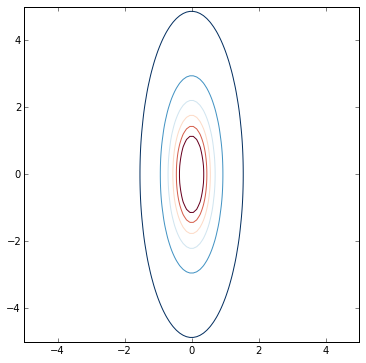

In [424]:
x = linspace(-10, 10, 100)
X, Y = meshgrid(x, x)
Z = f([X, Y]).T

fig, ax = subplots(figsize = (6, 6))

ax.contour(Z, cmap=cm.RdBu, extent = [-5, 5, -5, 5]);

In [463]:
x = minimize(f, array([1, 1]), method = "Powell", tol = 1.0e-10)
solution = x.x
print solution
print linalg.norm(solution, 2)

[  2.46903359e-08  -9.59695391e-09]
2.64898888764e-08


In [430]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        Objective function.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (Jacobian, Hessian).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead'
            - 'Powell'
            - 'CG'
            - 'BFGS'
            - 'Newton-CG'
            - 'Anneal (deprecated as of scipy version 0.14.0)'
            - 'L-BFGS-B'
            - 'TNC'
            - 'COBYLA'
            - 'SLSQP'
            - 'dogleg'
            - 'trust-ncg'
            - custom - a callable object (added in version 0.14.0)
    
  

### Lotka-Volterra problem

In [485]:
def F(v, t, a, b, c, d):
    x, y = v[0], v[1]
    dx = a*x - b*x*y
    dy = d*x*y - c*y
    return [dx, dy]

In [512]:
v0 = [500, 200]
T = linspace(0, 20, 200)

param1 = (0.3, 2, 7, 4)
param2 = (3, 2, 0, 1)
param3 = (5, 1, 1, 0.5)

y1 = odeint(F, v0, T, args = param1)
y2 = odeint(F, v0, T, args = param2)
y3 = odeint(F, v0, T, args = param3)

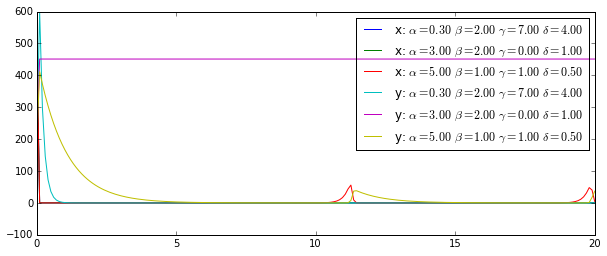

In [599]:
plt, ax = subplots()
format = r"$\alpha = %.2f$ $\beta = %.2f$ $\gamma = %.2f$ $\delta = %.2f$ "
forx = "x: " + format
fory = "y: " + format

ax.plot(T, y1[:,0], label = forx % param1)
ax.plot(T, y2[:,0], label = forx % param2)
ax.plot(T, y3[:,0], label = forx % param3)

ax.plot(T, y1[:,1], label = fory % param1)
ax.plot(T, y2[:,1], label = fory % param2)
ax.plot(T, y3[:,1], label = fory % param3)
ax.legend();

### FFT image denoising

In [600]:
moon = pylab.imread("moonlanding.png")

In [601]:
MOON = fft2(moon)

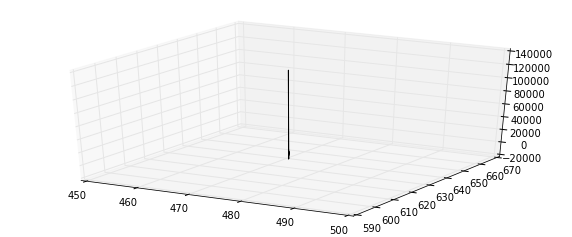

In [602]:
from mpl_toolkits.mplot3d import Axes3D
fig = figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = meshgrid(MOON.shape[0], MOON.shape[1])
ax.plot_surface(X, Y, MOON, vmin = 0, vmax = 1);

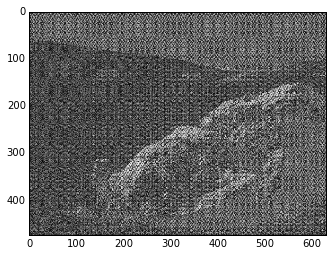

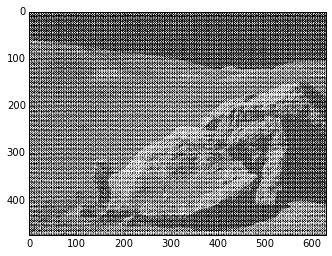

In [583]:
mask = abs(MOON) > 20000
MOON[mask] = 0
moon2 = abs(ifft2(MOON))
figure()
imshow(moon2, cmap = cm.Greys_r)
figure()
imshow(moon, cmap = cm.Greys_r);